<a href="https://colab.research.google.com/github/MontiMic/TesiMDP/blob/main/Tesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduzione
La seguente presentazione si propone di semplificare l'apprendimento di alcuni principi del calcolo probabilistico offrendo la possibilità di vedere applicare le leggi su grandi numeri e confrontando i risultati ottenuti con quelli attesi dalla teoria.

Di seguito includiamo le librerie che verranno utilizzate nel corso della presentazione:

In [134]:
import numpy as np
from ipywidgets import interact, interact_manual
from matplotlib import pyplot as plt
import math
import seaborn as sns
import random
import scipy.stats
import pandas as pd

##Elementi di python

Questa sezione è rivolta unicamente a chi non avesse ancora mai visto il python, allo scopo di mostrare alcune pratiche peculiari a Python.

La funzione np.zeros(n) restituisce un array di zeri lungo n

In [135]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

Specificando anche il type booleano facciamo una conversione: 

*  Gli zeri diventano False

* I valori diversi da zero diventano True

In [136]:
esempio = np.zeros(10, dtype=np.bool_)
print(esempio)

[False False False False False False False False False False]


Useremo questo tipo di struttura dati per simulare praticamente tutto, dalla roulette (True = rosso, False = nero) ad un urna di palline (quando ci basteranno 2 soli colori delle palline)

Per modificare un array il python ci offre uno strumento molto potente: lo slicing. Questa funzionalità permette di intervenire su un qualunque sottoinsieme dell'array se usata correttamente. A noi basta sapere che in un caso come esempio[1:5:2], stiamo intervenendo sull'array esempio, prendendo gli elementi dalla posizione 1 (inclusa) alla posizione 5 (esclusa) con passo 2:

In [137]:
esempio = ['a', 'b', 'c', 'd', 'e']
esempio[1:5:2]

['b', 'd']

Non specificare il primo parametro significa partire dall'elemento 0, omettere il secondo significa procedere fino all'ultimo (compreso) e non specificare il passo significa passo 1: non saltare nessun elemento.

La funzione range(n) restituisce un iterabile lungo n. In python è generalmente usata nel ciclo for.

In [138]:
for i in range(5):
  print(i)

0
1
2
3
4


##Funzioni utili

Quelle che seguono sono funzioni utilizzate in più test del documento, per il corretto funzionamento dei test successivi è necessario eseguire queste celle una volta.

In [139]:
#funzione che genera una roulette simulata da un array lungo 37 di cui 18 valori contano come "vittoria"
def mk_roulette():
  ruota = np.zeros(37, dtype=np.bool_)
  ruota[1::2] = True
  return ruota

In [140]:
#funzione che simula una singola partita alla roulette (1 o più puntate uguali) e, dato il portafogli di partenza, torno il nuovo conto
def partita(ruota, giocate, puntata, portafogli):
  while(giocate > 0):
      giocate = giocate - 1
      portafogli = portafogli - puntata #la puntata la considero sempre persa, in caso di vittoria vinco il doppio della puntata
      if(ruota[np.random.randint(0, (37))]): #estraggo un elemento casuale della roulette e verifico se è rosso
        portafogli = portafogli + (puntata * 2)
  return portafogli  

In [141]:
#funzione che simula un dado ritornando un intero compreso tra 1 e 6
def trow():
  return np.random.randint(1, 7)

In [142]:
#funzione che ritorna un'urna contenente palline di 2 colori in quanità scelta
def mk_urna(bianche, rosse):
  tot = bianche + rosse
  urna = np.zeros(tot, dtype=np.bool_)
  while(rosse > 0):
    rnd = np.random.randint(0, (tot))
    if (not urna[rnd]):
      urna[rnd] = True
      rosse = rosse - 1
  return urna

##Interpretazione dei risultati

I test di questo documento hanno lo scopo di mostrare che le formule viste con la teoria del calcolo probabilistico hanno un riscontro nella realtà. 
Ogni test simulerà per un numero di volte a discrezione dello studente, lo scenario descritto dall'esempio in esame. Si noti che un numero più alto di ripetizioni porterà a risultati più precisi.

In [143]:
def moneta(lanci):
  results = []
  for i in range(lanci): #lanciamo la moneta tante volte quante indicate dal parametro "lanci"
    results.append(np.random.randint(2))
  #grafico
  labels = []
  normalized = []
  normalized.append(round(((results.count(0) / lanci) * 100), 2)) #conto le istanze dei risultati e le normalizzo
  normalized.append(round(100 - sum(normalized), 2)) #per evitare che per errori di arrotondamento la somma dei risultati sia 99.9%, l'ultimo risultato lo calcolo come 100 - (la somma dei precedenti)
  for i in range(len(normalized)):
    labels.append(str(normalized[i]) + "%") # aggiungo le labels (i valori riportati all'esterno del grafico)
  plt.pie(normalized, labels=labels)
  legenda = ["Testa", "Croce"]
  plt.legend(legenda,loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

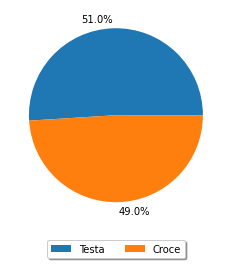

In [144]:
moneta(100)

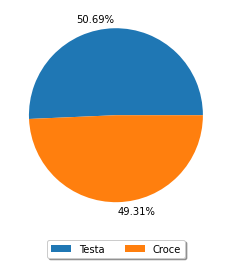

In [145]:
moneta(10_000)

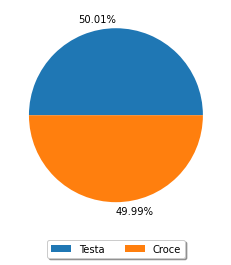

In [146]:
moneta(1_000_000)

Per un buon equilibrio tra accuratezza dei risultati e tempo di esecuzione impostiamo il numero di ripetizioni a 100 000 con la variabile "precisione".

In [147]:
precisione = 100_000

Si lascia allo studente la possibilità di incrementare questa variabile se desiderasse dei risultati più precisi.

# Variabili aleatorie discrete

Una variabile aleatoria _X_ si dice discreta se i valori che assume sono finiti oppure numerabili.

Nel caso siano numerabili molto spesso potremo pensare che siano semplicmente i numeri interi, ma non vogliamo escludere anche casi in cui abbiamo dei valori non interi.

##Esempio 1.1 
Faccio 3 puntate sul rosso alla roulette puntando 10 euro per volta, qual è la probabilità di vincere più di un certo valore _X_?

(Le vincite possibili sono valori finiti ed è quindi una variabile discreta)

In [148]:
@interact_manual(vincita=(0, 30))
def es11(vincita=5):
  giocate = 3
  puntata = 10
  ruota = mk_roulette()
  count = 0
  for i in range(precisione):
    portafogli = giocate * puntata
    portafogli = partita(ruota, giocate, puntata, portafogli) #il portafogli viene aggiornato dopo aver simulato una partita
    if((portafogli - (giocate*puntata)) >= vincita): #se ho finito le 3 puntate con una vincita maggiore o uguale a quella sperata la aggiungo al conteggio
      count = count + 1
  return round(count / precisione, 3)

interactive(children=(IntSlider(value=5, description='vincita', max=30), Button(description='Run Interact', st…

##Esempio 1.2
Dati il numero di puntate ed i soldi scommessi ogni volta, quanto mi dovrei aspettare di aver vinto alla fine? (risultato in euro)

In [149]:
@interact_manual(giocate=(1, 10), puntata=(5, 100, 5))
def es12(giocate = 3, puntata = 10):
  portafogli = giocate * puntata * precisione
  ruota = mk_roulette()
  for i in range(precisione):
    portafogli = partita(ruota, giocate, puntata, portafogli)
  portafogli = portafogli / precisione
  return round(portafogli - (giocate * puntata), 2)

interactive(children=(IntSlider(value=3, description='giocate', max=10, min=1), IntSlider(value=10, descriptio…

# Distribuzione uniforme e non uniforme

Sia _A_ = {_x1_, . . . , _xn_}; una variabile _X_ che assume i valori in _A_ tutti con la stessa probabilità $\frac{1}{n}$
si dice _variabile uniforme_ su _A_. Scriviamo in questo caso _X_ ∼ _U_(_A_) oppure _X_ ∼ _U_(_x1_, . . . , _xn_).
La densità è quindi:

\begin{equation}
  px(h) =
    \begin{cases}
           \frac{1}{n} \ se \  h  \ ∈ \ ({x1}, {x2}, ..., {xn})
          \\
          0 \ altrimenti
        \end{cases}
\end{equation}

##Esempio 2.1 
Nel lancio di un dado sia Ω = {1, 2, 3, 4, 5, 6} l’insieme dei possibili risultati.
Allora la funzione _X_(_n_) = n per ogni n ∈ Ω è una variabile aleatoria uniforme _X_ ∼ _U_(1, 2, 3, 4, 5, 6).


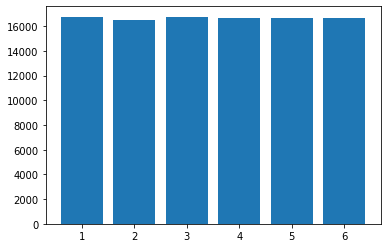

In [150]:
def es21():
  results = []
  for i in range(precisione):
    results.append(trow()) #aggiungo il risultato del tiro alla lista dei risultati
  
  #grafico
  elem_count = []
  labels = []
  for i in range(len(set(results))): #conto le istanze di ogni risultato ottenuto ed aggiungo i totali a elem_count, poi lo metto a grafico
    elem_count.append(results.count(i+1))
    labels.append(str(i+1))
  plt.bar(labels, elem_count)
es21()

##Esempio 2.2
Se invece lanciassimo due dadi, la variabile _X_ che assume un valore corrispondente al numero di risultati pari ottenuti dal lancio sarebbe una _variabile non uniforme_ siccome la sua densità sarebbe:

\begin{equation}
  py(h) =
    \begin{cases}
          \frac{1}{4} \  h={0},{2}
          \\
          \frac{1}{2} \ h={1}
          \\
          0 \ altrimenti
        \end{cases}
\end{equation}

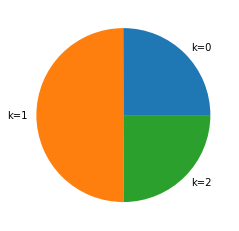

In [151]:
def es22():
  results = []
  for i in range(precisione):
    a, b = trow(), trow() #lancio due dadi, poi conterò quanti sono pari per aggiungere il risultato alla lista
    results.append(2-((a % 2)+(b % 2))) #conto i dadi pari come due meno i dadi dispari (n%2 = 1 per n dispari, 0 altrimenti)
  
  #grafico
  valori = []
  normalized = []
  for i in range(3): #conto le istanze dei risultati e le divido per il numero di risultati totale (normalizzo)
    normalized.append(results.count(i) / len(results)) #len(results) torna la lunghezza della lista results
    valori.append("k=" + str(i))
  plt.pie(normalized, labels=valori)
es22()

#Densità binomiale

Consideriamo un fenomeno aleatorio e un certo evento ad esso associato. Per semplicità diciamo che se l’evento si realizza otteniamo un “successo”, viceversa che abbiamo ottenuto un “insuccesso".
Uno schema successo-insuccesso consiste nel ripetere questo fenomeno un certo fissato numero di volte, dette anche prove o tentativi, in cui siamo interessati unicamente al numero di successi ottenuti
nelle varie prove.
Supponiamo ora che le prove siano indipendenti l’una dall’altra, cioè vengono effettuate tuttevnelle medesime condizioni, indipendentemente dal risultato delle prove precedenti: parliamo in questo caso di schema successo-insuccesso con ripetizione o a prove indipendenti. Consideriamo
quindi la variabile X data dal numero di successi in n tentativi.
Nel caso in cui le prove siano indipendenti l’una dall’altra, la probabilità di ottenere una certa prefissata sequenza di successi e insuccessi dipende solo dal numero di questi ultimi e non dall’ordine con cui vogliamo che si succedano. La probabilità di ottenere una sequenza fissata in cui abbiamo k successi e n − k insuccessi è data da
$p^k(1-p)^{n-k}$, dove p è la probabilità che ogni singolo tentativo abbia successo. Siccome i modi in cui possiamo scegliere le k posizioni per i successi sono date da ${n\choose k}$ otteniamo per la variabile X la densità data da

\begin{equation}
  px(k) =
    \begin{cases}
          {n\choose k} p^k(1-p)^{n-k} \ se \ k=1,2,...,n
          \\
          0 \ altrimenti
        \end{cases}
\end{equation}


Scriveremo in questo caso _X_ ∼ _B_(_n_, _p_) e diciamo che _X_ è una variabile binomiale.

##Esempio 3.1

Supponiamo di andare al casinò con 15 Euro e puntiamo 3 volte 5 Euro alla roulette sul rosso. Consideriamo la variabile aleatoria X data dai soldi che abbiamo in tasca alla fine delle 3 puntate. La probabilità di ottenere un numero rosso è di $\frac{18}{37}$ ad ogni tentativo.
Determinare la densità di X.
La variabile X può assumere i valori 30, 20, 10, 0 a seconda di quanti rossi sono usciti. Abbiamo:

P(X = 30) = $(\frac{18}{37})^3$ = 0,115

P(X = 20) = ${3\choose 1}(\frac{18}{37})^2 · \frac{19}{37}$= 0, 365

P(X = 10) = ${3\choose 2}(\frac{18}{37}) · (\frac{19}{37})^2$ = 0,385

P(X = 0) = $(\frac{19}{37})^3$ = 0,135


In [152]:
@interact_manual(giocate=(1, 6), puntata=(5, 100, 5))
def es31(giocate = 3, puntata = 5):
  ruota = mk_roulette()
  results = []
  for i in range(precisione):
    portafogli = giocate * puntata
    portafogli = partita(ruota, giocate, puntata, portafogli)
    results.append(portafogli)
  
  #grafico
  normalized = []
  valori = []
  for i in range(giocate):
    normalized.append(round(((results.count(puntata*2*i) / precisione) * 100), 2)) #conto le istanze dei risultati e le normalizzo
  normalized.append(round(100 - sum(normalized), 2)) #per evitare che per errori di arrotondamento la somma dei risultati sia 99.9%, l'ultimo risultato lo calcolo come 100 - (la somma dei precedenti)
  labels = []
  for i in range(len(normalized)):
    labels.append(str(normalized[i]) + "%") # aggiungo le labels (i valori riportati all'esterno del grafico)
  plt.pie(normalized, labels=labels)
  legenda = []
  for i in range(len(normalized)):
    legenda.append(str(puntata*2*i))
  plt.legend(legenda,loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

interactive(children=(IntSlider(value=3, description='giocate', max=6, min=1), IntSlider(value=5, description=…

# Densità ipergeometrica


Un altro tipo di schema successo-insuccesso è il cosiddetto schema successo-insuccesso _senza ripetizione_. In questo caso il fenomeno aleatorio consiste nell’estrazione di n palline, senza rimpiazzare di volta in volta la pallina estratta, da un'urna contenente b palline bianche e r palline rosse.
Diciamo che la prova (estrazione) dà successo se viene estratta una pallina bianca e consideriamo la variabile X data dal numero di successi ottenuti, cioè dal numero di palline bianche estratte.


Osserviamo che X può assumere tutti i valori tra max(0, n − r) e min(n, b): infatti se n > r siamo sicuri di pescare almeno n−r palline bianche e chiaramente il numero di bianche estratte non può superare nè il numero estrazioni nè il numero di palline bianche.

Lo spazio Ω è dato da tutti i possibili sottoinsiemi di n oggetti (le palline estratte) scelti da un insieme di b + r oggetti (le palline
disponibili), con probabilità uniforme. L’evento “X = k” è dato quindi da tutti i sottoinsiemi delle b + r palline costituiti da k palline bianche e n − k palline rosse. Le k bianche le posso scegliere in ${b\choose k}$ modi. Le n − k rosse in ${r \choose {n - k}}$ modi. Abbiamo quindi che la densità di X è data da

\begin{equation}
  px(k) =
    \begin{cases}
          \frac{{b \choose k} · {r \choose n - k}}{b + r \choose n} \ se \ k=max(0, n-r),...,min(n,b)
          \\
          0 \ altrimenti
        \end{cases}
\end{equation}

Scriviamo in questo caso X ∼ H(n; b, r) e diciamo che X è una variabile ipergeometrica.

##Esempio 4.1
Un’urna contiene 8 palline bianche e 2 rosse. Ne estraiamo 3 senza rimpiazzo.
Qual è la probabilità di estrarne al più una rossa? In questo caso, a differenza del precedente abbiamo che la variabile X = numero di rosse estratte è una ipergeometrica X ∼ H(3; 2, 8) per
cui

P(_X_ ≤ 1) = P(_X_ = 0) + P(_X_ = 1) = $\frac{{2 \choose 0}·{8 \choose 3}}{10 \choose 3}$ + $\frac{{2 \choose 1}·{8 \choose 2}}{10 \choose 3}$ = $\frac{14}{15}$ = 0.933

In [153]:
@interact_manual(estrazioni=(1, 10))
def es41(estrazioni=3):
  bianche = 8
  rosse = 2
  urna = mk_urna(bianche, rosse)
  results = 0
  for i in range(precisione):
    tmp = urna
    for i in range(estrazioni):
      tmp = np.delete(tmp, np.random.randint(0, ((bianche + rosse)-i)))
    if(tmp.sum() > 0):
      results = results + 1  
  return round(results / precisione, 3)

interactive(children=(IntSlider(value=3, description='estrazioni', max=10, min=1), Button(description='Run Int…

#Densità geometrica - geometrica modificata

In uno schema successo-insuccesso, anzichè al numero di successi ottenuti su n tentativi, potremmo essere interessati al numero di tentativi che devo effettuare prima di ottenere un successo.

##Esempio 5.1

Consideriamo un’urna con 2 palline bianche e 3 rosse. Le estraggo senza
rimpiazzo finchè non trovo una pallina rossa. Considero la variabile aleatoria X=numero di estrazioni per trovare una pallina rossa. X è una variabile finita in quanto assume solo i valori 1, 2, 3.
La sua densità si determina facilmente ed è data da

\begin{equation}
  px(k) =
    \begin{cases}
          \frac{6}{10} \ se \ k=1
          \\
          \frac{3}{10} \ se \ k=2
          \\
          \frac{1}{10} \ se \ k=3
          \\
          0 \ altrimenti
        \end{cases}
\end{equation}



In [154]:
@interact_manual(bianche=(1,5), rosse=(1, 5))
def es51(bianche=2, rosse=3):
  palle = mk_urna(bianche, rosse)
  results = []
  count=0
  while(len(results) < precisione):
    done = len(results)
    tmp = palle
    while(len(results) == done):
      extr = np.random.randint(0, ((bianche+rosse)-count))
      if(tmp[extr]):
        results.append(count)
        count=0
      else:  
        tmp = np.delete(tmp,extr)
        count = count + 1
  
  #grafico
  labels = []
  normalized = []
  for i in range(len(set(results)) - 1): #len(set(n)) torna il numero di risultati distinti presenti in results
    normalized.append(round(((results.count(i) / precisione) * 100), 2)) #conto le istanze dei risultati e le normalizzo
  normalized.append(round(100 - sum(normalized), 2)) #per evitare che per errori di arrotondamento la somma dei risultati sia 99.9%, l'ultimo risultato lo calcolo come 100 - (la somma dei precedenti)
  for i in range(len(normalized)):
    labels.append(str(normalized[i]) + "%") # aggiungo le labels (i valori riportati all'esterno del grafico)
  plt.pie(normalized, labels=labels)
  legenda = []
  for i in range(bianche + 1):
    legenda.append("k="+str(i+1))
  plt.legend(legenda,loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

interactive(children=(IntSlider(value=2, description='bianche', max=5, min=1), IntSlider(value=3, description=…

Caso interessante:

Nel caso di una sola pallina rossa ed _n_ palline bianche, non si ha un'estrazione in cui è più probabile trovare la rossa, hanno tutte probabilità $\frac{1}{n+1}$ come si può verificare ri-lanciando l'esperimento precedente con una sola pallina rossa.

##Esempio 5.2

Ripetiamo l'esperimento precedente, ma questa volta rimpiazziamo la pallina ad ogni estrazione. La variabile X diventa numerabile e si ha

\begin{equation}
  px(k) =
    \begin{cases}
          (\frac{2}{5})^{k-1}\frac{3}{5} \ se \ k=1,2,3,...
          \\
          0 \ altrimenti
        \end{cases}
\end{equation}

Infatti richiedere X = k vuol dire aver ottenuto k − 1 insuccessi nei primi k − 1 tenativi (ognuno con probabilità $\frac{2}{5}$) per poi finalmente ottenere un successo al k-esimo tentativo (con probabilità $\frac{3}{5}$)

In [155]:
@interact_manual(bianche=(1,5), rosse=(1, 5))
def es52(bianche=2, rosse=3):
  palle = mk_urna(bianche, rosse)
  results = []
  count=0
  while(len(results) < precisione):
    done = len(results)
    tmp = palle
    while(len(results) == done):
      extr = np.random.randint(0, (bianche+rosse))
      if(tmp[extr]):
        results.append(count)
        count=0
      else:  
        count = count + 1
  
  #grafico risultati
  labels = []
  normalized = []
  for i in range(len(set(results))): 
    normalized.append(round(((results.count(i) / precisione) * 100), 2))
  for i in range(len(set(results))):
    labels.append(str(i+1))
  
  #grafico teorico
  teoria = []
  for i in range(len(set(results))):
    teoria.append(((bianche / (bianche + rosse))**(i)) * (rosse / (bianche + rosse)) * 100)

  lab_arr = np.arange(len(labels))

  w=0.4
  plt.bar(lab_arr-(w/2), normalized, width=w)
  plt.bar(lab_arr+(w/2), teoria, width=w)
  plt.ylabel("Percentage")
  plt.xlabel("K")
  legenda = ["Risultati ottenuti", "Risultati attesi"]
  plt.legend(legenda,loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

interactive(children=(IntSlider(value=2, description='bianche', max=5, min=1), IntSlider(value=3, description=…

Quello appena visto è un esempio di _densità geometrica modificata_ che scriveremo come T ∼ Ḡ(_p_).

Quando si parla di densità geometrica modificata? 

Si consideri uno schema successo-insuccesso con ripetizioni e prendiamo in esame la variabile T data dal tempo di primo successo. 
Se chiamiamo _Xi_ le variabili _B_(1, _p_) date da _Xi_ = 1 se l’i-esimo tentativo dà successo e _Xi_  = 0 altrimenti abbiamo come densità

\begin{equation}
  px(k) =
    \begin{cases}
          p(1-p)^{k-1} \ se \ k=1,2,3,...
          \\
          0 \ altrimenti
        \end{cases}
\end{equation}

La geometrica standard equivale invece alla modificata a cui viene applicato uno shift di 1. Più precisamente, una variabile geometrica standard la
possiamo vedere come il numero di insuccessi ottenuti in uno schema successo-insuccesso prima di ottenere un successo. In particolare abbiamo che la densità è data da

\begin{equation}
  p(k) =
    \begin{cases}
          p(1-p)^{k} \ se \ k=1,2,3,...
          \\
          0 \ altrimenti
        \end{cases}
\end{equation}

##Esempio 5.3

Si lancino simultaneamente due dadi, uno rosso e uno blu. Ripetiamo questo
esperimento finchè non otteniamo due 6. 

Poniamo X = primo lancio in cui il dado rosso ha dato 6,
Y = primo lancio in cui il dado blu ha dato 6.


Determinare inoltre la probabilità di ottenere 6 con il dado rosso prima di ottenere 6 con il dado blu.

Abbiamo

\begin{equation}
  1 = P(X < Y) + P(X > Y) + P(X = Y)
\end{equation}

\\
e chiaramente per simmetria del problema _P_(_X_ < _Y_) = _P_(_X_ > _Y_) da cui

\\

\begin{equation}
  P(X < Y)= \frac {1-P(X = Y)}{2}
\end{equation}

Ci basterà calcolare quindi _P_(_X_ =_Y_):

\\

\begin{equation}
  P(X = Y) = \sum_{k=1}^\infty P(X = Y = k) = \sum_{k=1}^\infty (\frac{25}{36})^{k-1}·\frac{1}{36} = \frac{1}{1-\frac{25}{36}}·\frac{1}{36} = \frac{1}{11}
\end{equation}


dove abbiamo ancora utilizzato la somma di una serie geometrica, e quindi

\\

\begin{equation}
  P(X < Y) = \frac{5}{11}
\end{equation}


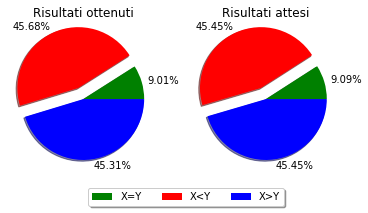

In [156]:
def es53():
  num = 6
  results = []
  for i in range(precisione):
    a, b = 0, 0
    while a != num and b != num:
      a, b = trow(), trow() 
      if a == num:
        if b == num:
          results.append(0)
        else:
          results.append(1)
      if b == num:
        results.append(2)  
  
  #grafico
  labels = []
  normalized = []
  myexplode = [0, 0.2, 0]
  for i in range(len(set(results)) - 1): #len(set(n)) torna il numero di risultati distinti presenti in results
    normalized.append(round(((results.count(i) / precisione) * 100), 2)) #conto le istanze dei risultati e le normalizzo
  normalized.append(round(100 - sum(normalized), 2)) #per evitare che per errori di arrotondamento la somma dei risultati sia 99.9%, l'ultimo risultato lo calcolo come 100 - (la somma dei precedenti)
  for i in range(len(normalized)):
    labels.append(str(normalized[i]) + "%") # aggiungo le labels (i valori riportati all'esterno del grafico)

  teoria = [1/11, 5/11, 5/11]
  lab_teoria = ["9.09%", "45.45%", "45.45%"]

  f, (ax1, ax2) = plt.subplots(1, 2)
  ax1.pie(normalized, labels=labels,explode=myexplode, colors=["green", "red", "blue"], shadow=True)
  ax1.set_title("Risultati ottenuti")
  ax2.pie(teoria, labels=lab_teoria,explode=myexplode, colors=["green", "red", "blue"], shadow=True)
  ax2.set_title("Risultati attesi")
  
  legenda = ["X=Y", "X<Y", "X>Y"]
  ax1.legend(legenda,loc='upper left', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

es53()

#Densità di Poisson

Se consideriamo una variabile binomiale _X_ ∼ _B_(_n_, _p_) in cui il numero _n_ di tentativi è molto grande e il parametro _p_ molto piccolo fare i conti con la densità binomiale risulta essere computazionalmente dispendioso. 

Facciamo un esempio:

##Esempio 6.1

Supponiamo che in una città nascano 10 000 bambini ogni anno e che ci
sia una malattia rara che colpisce un bambino su 2 mila. Qual è la probabilità che quest’anno nascano più di 5 bambini affetti da questa malattia? 

La variabile _X_ = ”numero di bambini nati con questa malattia quest’anno” è una variabile binomiale _X_ = _B_($10^4$, $\frac{1}{2000}$). Tuttavia se
proviamo ad effettuare il calcolo _P_(_X_ > 5), anche se abbiamo una formula esatta per effettuarlo, è inevitabilmente molto complesso.


Per risolvere questo tipo di problema introduciamo la seguente

\\
\begin{equation}
  p(k) =
    \begin{cases}
          e^{-λ} \frac{λ^k}{k!} \ se \ k=0,1,2,...
          \\
          0 \ altrimenti
        \end{cases}
\end{equation}

\\

dove λ è un parametro reale strettamente positivo.

Nel nostro esempio possiamo pensare alla variabile _X_ come ad una variabile di Poisson di parametro 5. 

Otteniamo:

\begin{equation}
  P(X > 5) = 1 − P(X = 0) − P(X = 1) − P(X = 2) − P(X = 3) − P(X = 4) 
  \\
  = 1 − e^{−5}(1 + 5 + \frac{25}{2} + \frac{125}{6} + \frac{625}{24} + \frac{3125}{120}) = 0, 384.
\end{equation}

Nella simulazione riportata sono simulati 100 anni, ripetendo l'esperimento si aggiungono i risultati dei test successivi e si può osservare come il grafico dei risultati ottenuti si avvicini a quello dei risultati attesi.

In [157]:
res_poisson = []

In [158]:
def es61():
  bambini = 10_000
  malattia = 2_000
  for i in range(100):
    count = 0
    for i in range(bambini):
      if np.random.randint(malattia) == 1:
        count = count + 1
    res_poisson.append(count)

  #grafico risultati
  set_res = list(set(res_poisson))
  normalized = []
  for i in set_res: 
    normalized.append(round(((res_poisson.count(i) / len(res_poisson)) * 100), 2))
 
  #grafico teorico
  teoria = []
  lam = bambini / malattia
  for i in set_res:
    teoria.append((math.e**-lam)*((lam**i)/math.factorial(i)) * 100)

  lab_arr = np.arange(len(set_res))

  w=0.4
  plt.bar(lab_arr-(w/2), normalized, width=w)
  plt.bar(lab_arr+(w/2), teoria, width=w)

  legenda = ["Risultati ottenuti", "Risultati attesi"]
  plt.legend(legenda,loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
  print("Anni simulati: " + str(len(res_poisson)))

Anni simulati: 100


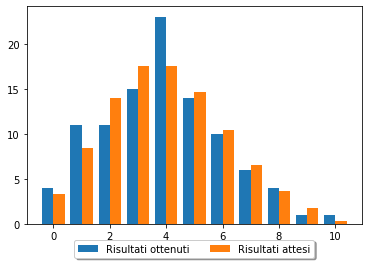

In [159]:
es61()

#Densità continua uniforme

La variabile continua più semplice da studiare è quella che può assumere solo valori in un certo intervallo limitato e in modo ”uniforme”.

## Esempio 7.1

Un autobus passa da una fermata ogni 10 minuti. Noi arriviamo alla fermata in un momento casuale, chiamiamo T la variabile del tempo d'attesa che assume valori tra 0 e 10 minuti. Mediamente, quanto dovrò aspettare?

Iniziamo prendendo l'autobus un po' di volte tenendo uno storico dei tempi di attesa:

In [160]:
uniforme = []
tempo = 10
for i in range(precisione):
  uniforme.append(random.uniform(0, tempo))

In [161]:
#funzione che calcola il valore di x in ogni punto (densità continua uniforme)
def densita(x, a, b):
  res = []
  for i in x:
    if i < a:
      res.append(0)
    elif i > b:
      res.append(0)
    else:
      res.append(1 / (b - a))
  return res

E mettiamo a grafico i risultati ottenuti

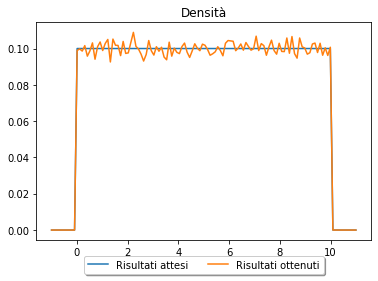

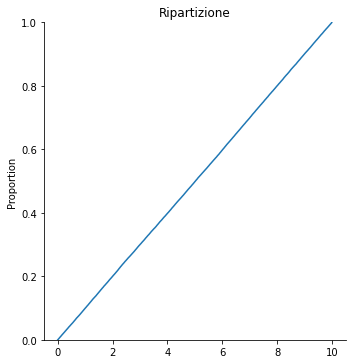

In [162]:
def es71():
  points = (tempo + 2) * 10

  coord = []
  for i in range(points):
    count = 0
    for item in uniforme:
      if (item > -1 + (((tempo+2)/points)*i) and item <= -1 + (((tempo+2)/points)*(i+1))): #conto i risultati appartenenti ad un intervallo intorno al punto per ogni punto del grafico
        count = count + 1
    coord.append((count / precisione) * (points / (tempo + 2)))

  #grafico
  x = np.linspace(-1, tempo+1, points)
  p1 = plt.figure(1)
  ax = plt.axes()
  ax.plot(x, densita(x, 0, tempo))
  ax.plot(x, coord)
  ax.set_title("Densità")
  legenda = ["Risultati attesi", "Risultati ottenuti"]
  plt.legend(legenda,loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
  sns.displot(uniforme, kind="ecdf").set(title="Ripartizione") 
es71()

Per quanto riguarda la soluzione il valore atteso invece ci basta sapere che il valore atteso di una variabile uniforme è il punto medio dell'intervallo: 5 minuti.

In [163]:
@interact_manual(tempo=(1, 20))
def es71(tempo = 10):
  results = []
  for i in range(precisione):
    results.append(random.uniform(0, tempo))
  return round(np.mean(results), 2)

interactive(children=(IntSlider(value=10, description='tempo', max=20, min=1), Button(description='Run Interac…

##Esercizio 7.2

Continuiamo con l'esempio del bus ma questa volta ci interessa sapere la probabilità che arrivi in un certo intervallo di tempo

In [164]:
@interact_manual(a=(0, 10), b=(0, 10))
def es72(a = 4, b = 6):
  if a > b:
    return ("Intervallo non valido")

  unif1 = [x for x in uniforme if x >= a and x <= b]

  #grafico 
  points = (tempo + 2) * 10

  x = np.linspace(-1, tempo+1, points)

  coord = []
  for i in range(points):
    count = 0
    for item in uniforme:
      if (item > -1 + (((tempo+2)/points)*i) and item <= -1 + (((tempo+2)/points)*(i+1))):
        count = count + 1
    coord.append((count / precisione) * (points / (tempo + 2)))

  coord2 = []
  for i in range(points):
    count = 0
    for item in unif1:
      if (item > -1 + (((tempo+2)/points)*i) and item <= -1 + (((tempo+2)/points)*(i+1))):
        count = count + 1
    coord2.append((count / precisione) * (points / (tempo + 2)))

  plt.plot(x, coord)
  plt.fill_betweenx(coord2, x, alpha=0.30)
  
  ris1 = round((b-a) / tempo, 3)
  print("Risultati attesi: " + str(ris1))
  ris2 = round(len(unif1) / precisione, 3)
  print("Risultati ottenuti: " + str(ris2))

interactive(children=(IntSlider(value=4, description='a', max=10), IntSlider(value=6, description='b', max=10)…

#Densità continua esponenziale

Fissiamo un parametro _λ_ e ricordiamo che una primitiva della funzione $e^{−λt}$ è data da -$\frac{1}{λ}e^{−λt}$ da cui abbiamo che:

\begin{equation}
  \int_{0}^{+ \infty} e^{-λt} \,dt = \frac{1}{λ} 
\end{equation}

Proposizione:

\begin{equation}
  f(s) =
    \begin{cases}
          λ e^{-λs} \ se \ s \geq 0
          \\
          0 \ altrimenti
        \end{cases}
\end{equation}

dove _λ_ è un parametro positivo con densità continua astratta.

Una variabile _X_ che ammette tale densità si dice esponenziale di parametro _λ_ e scriveremo _X_ ∼ Exp(_λ_). Lo stesso calcolo mostra che la funzione di ripartizione di una variabile _X_ ∼ Exp(_λ_) è data da

\begin{equation}
  Fx(t) =
    \begin{cases}
          1-e^{-λt} \ se \ t \ge 0
          \\
          0 \ \ \ \ \ \ \ \ \ \ \ \ \ se \ t \le 0
        \end{cases}
\end{equation}

##Esempio 8.1

Il decadimento di una particella radioattiva segue una legge esponenziale di parametro λ = 1 (in giorni).

Qual è la probabilità che dopo 3 ore sia già decaduta?

Usando un cambio di variabile simuliamo un set di valori di una variabile esponenziale con parametro _λ_ = 1 

In [165]:
exp = []
for i in range(precisione):
  exp.append(-math.log(random.uniform(0, 1)))

E ne grafichiamo la densità e la partizione 

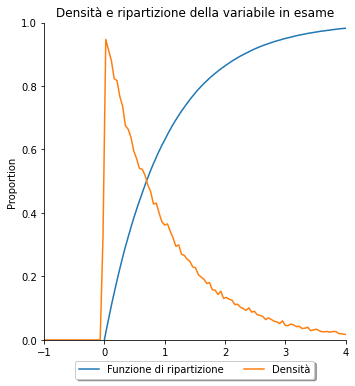

In [166]:
def exp_plot():
  points = 130
  space = 6

  x = np.linspace(-1, space - 1, points)

  coord = []
  for i in range(points):
    count = 0
    for item in exp:
      if (item > -1 + (((space)/points)*i) and item <= -1 + (((space)/points)*(i+1))):
        count = count + 1
    coord.append((count / precisione) * (points / (space)))
  
  sns.displot(exp, kind="ecdf")
  plt.plot(x, coord)
  plt.xlim(-1, 4)
  plt.title("Densità e ripartizione della variabile in esame")

  legenda = ["Funzione di ripartizione", "Densità"]
  plt.legend(legenda,loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

exp_plot()

Tornando alla domanda iniziale, contiamo quante volte abbiamo ottenuto un tempo minore di 3 ore e confrontiamolo coi risultati attesi dalla teoria.

In [167]:
@interact_manual(ore=(0, 72))
def es81(ore = 3):
  count = 0
  for item in exp:
    if (item * 24) <= ore:
      count = count + 1
  print("Risultati ottenuti: " + str(round(count / precisione, 3)))
  res = 1 - (math.e**(-1 * (ore / 24)))
  print("Risultati attesi: " + str(round(res, 3)))

interactive(children=(IntSlider(value=3, description='ore', max=72), Button(description='Run Interact', style=…

Fin'ora abbiamo visto variabili esponenziali aventi _λ_ = 1, il caso base. Vediamo ora lo stesso esempio ma questa volta il tempo di decadimento della particella è segue una legge esponenziale di parametro _λ_ ≠ 1.

Iniziamo vedendone il grafico della densità:

In [168]:
@interact_manual(λ=(2, 10))
def exp_test(λ=2):
  lamb = λ

  test = []
  for i in range(precisione): #produco i singoli tentativi col cambio di variabile
    test.append((-1/(lamb))*math.log(random.uniform(0, 1)))

  b = max(test)/3
  a = -b/10
  points = 100
  x = np.linspace(a, b, points)

  coord = []
  for i in range(points):
    count = 0
    for item in test:
      if (item > a + (((abs(a) + b)/points)*i)) and (item <= a + (((abs(a) + b)/points)*(i+1))):
        count = count + 1
    coord.append((count / precisione) * (points / (abs(a) + b)))

  plt.plot(x, coord)

interactive(children=(IntSlider(value=2, description='λ', max=10, min=2), Button(description='Run Interact', s…

E confrontiamo i risultati che abbiamo ottenuto con quelli attesi dalla teoria:

In [169]:
@interact_manual(ore=(0, 72), λ=(2, 10))
def exp_particella(ore = 10, λ = 2):
  test = []
  for i in range(precisione):
    test.append((-1/λ)*math.log(random.uniform(0, 1)))
  count = 0
  for item in test:
    if (item * 24) <= ore:
      count = count + 1
  print("Risultati ottenuti: " + str(round(count / precisione, 3)))
  res = 1 - (math.e**(-(λ * (ore / 24))))
  print("Risultati attesi: " + str(round(res, 3)))

interactive(children=(IntSlider(value=10, description='ore', max=72), IntSlider(value=2, description='λ', max=…

## Esercizio 8.2

Continuiamo con l'esempio della particella ma questa volta ci interessa sapere la probabilità decada in un certo intervallo di tempo

In [170]:
def bounds(x, a, b):
  res = []
  for i in x:
    if i < a:
      res.append(0)
    elif i > b:
      res.append(0)
    else:
      res.append(1)
  return res

In [171]:
@interact_manual(t1=(0, 96), t2=(0, 96))
def es82(t1=3, t2=10):
  if t1 > t2:
    return ("Intervallo non valido")
  
  points = 325
  tempo = 4.5
  a = -0.5

  x = np.linspace(a, tempo + a, points)
  
  exp1 = []
  for i in range(precisione):
    exp1.append(-math.log(random.uniform(0, 1)))

  exp2 = [x for x in exp1 if x >= t1/24 and x <= t2/24]

  coord = [0]
  for i in range(points-1):
    count = 0
    for item in exp1:
      if (item > a + (((tempo)/(points-1))*i) and item <= a + (((tempo)/(points-1))*(i+1))):
        count = count + 1
    coord.append((count / precisione) * ((points-1) / (tempo)))
  
  y = np.minimum(bounds(x, t1/24, t2/24), coord)
  
  ris1 = round((1 - (math.e**(-(t2 / 24)))) - (1 - (math.e**(-(t1 / 24)))), 3)
  print("Risultati attesi: " + str(ris1))
  ris2 = round(len(exp2) / precisione, 3)
  print("Risultati ottenuti: " + str(ris2))

  plt.plot(x, coord)
  plt.fill_between(x, y, alpha=0.30)

interactive(children=(IntSlider(value=3, description='t1', max=96), IntSlider(value=10, description='t2', max=…

#Densità continua normale

Passiamo ora a considerare quelle che sono probabilmente le variabili aleatorie continue più rilevanti.
Si può dimostrare (e Gauss lo ha fatto per primo) che

\begin{equation}
  \int_{- \infty}^{+ \infty} e^{-{\frac{x^2}{2}}} \,dx = \sqrt{2 \pi} 
\end{equation}

Ne segue che la funzione

\begin{equation}
  f(s)= \frac{1}{\sqrt{2 \pi}}e^{-{\frac{x^2}{2}}}
\end{equation}

è una densità. Questa densità viene detta normale standard o gaussiana standard e se una variabile _X_ che ammette questa densità scriveremo

\begin{equation} 
  X ∼ N(0, 1)
\end{equation}

Il primo parametro è la media, ovvero il valore medio della distribuzione. Il secondo è la deviazione standard.

Di seguito vediamo i grafici della funzione di ripartizione e della densità di una normale al variare di media e deviazione standard:

In [172]:
@interact(mean=(-5, 5), std_dev=(1, 5))
def std_norm(mean = 0, std_dev = 1):
  a = -10
  x = np.linspace(a, abs(a), 100)
  dnd = []
  for i in x:
    dnd.append(scipy.stats.norm(mean, std_dev).pdf(i))
  plt.plot(x, dnd)
  legenda = ["Densità"]
  plt.legend(legenda,loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

interactive(children=(IntSlider(value=0, description='mean', max=5, min=-5), IntSlider(value=1, description='s…

In [173]:
@interact(mean=(-5, 5), std_dev=(1, 5))
def std_norm(mean = 0, std_dev = 1):
  a = -10
  x = np.linspace(a, abs(a), 100)
  pnd = []
  for i in x:
    pnd.append(scipy.stats.norm(mean, std_dev).cdf(i))
  plt.plot(x, pnd)
  legenda = ["Funzione di ripartizione"]
  plt.legend(legenda,loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

interactive(children=(IntSlider(value=0, description='mean', max=5, min=-5), IntSlider(value=1, description='s…

## Esempio 9.1

Sia _X_ una variabile continua normale standard, determinare la probabilità che _X_ assuma un valore minore di 1.

In [174]:
@interact_manual(valore=(-4, 4, 0.1))
def es91(valore = 1):
  a = -4
  points = 401

  x = np.linspace(a, abs(a), points)

  nd1 = []
  for i in range(precisione):
    nd1.append(np.random.normal(0, 1))

  nd2 = [x for x in nd1 if x <= valore]

  coord = [0]
  for i in range(points - 1):
    count = 0
    for item in nd1:
      if (item > a + (((-2*a)/points)*i)) and (item <= a + (((-2*a)/points)*(i+1))):
        count = count + 1
    coord.append((count / precisione) * (points / (-2*a)))
  
  y = np.minimum(bounds(x, -5, valore), coord)

  ris1 = round(scipy.stats.norm(0, 1).cdf(valore), 3)
  print("Risultati attesi: " + str(ris1))
  ris2 = round(len(nd2) / precisione, 3)
  print("Risultati ottenuti: " + str(ris2))

  plt.fill_between(x, y, alpha=0.30)
  plt.plot(x, coord)

interactive(children=(FloatSlider(value=1.0, description='valore', max=4.0, min=-4.0), Button(description='Run…

## Esempio 9.2

Uno studio su 100 000 diciottenni (reclutati dalle scuole e dal Maternal and Child Health Centres ad Hong Kong) ha mostrato che l'altezza di un'adulto ha una densità normale _N_ (172, 5).

 Una divisa per reclute è disponibile in 4 taglie:
 
Taglia   | Altezza 
---------|------------------
S        | h < 164
M        | 164 < h < 172
L        | 172 < h < 180
XL       | h > 180

Dovendo vestire 500 nuove reclute quante divise di ogni taglia comprereste?

Per validare i risultati che calcolati con le formule, li confronteremo con le altezze di 20 000 adulti che hanno partecipato all'esperimento ma le cui altezze non sono state usate per per definire la distribuzione, ma lasciate per validarla.

In [175]:
data_url = "https://raw.githubusercontent.com/MontiMic/TesiMDP/main/train.csv" #importo il dataset
data = pd.read_csv(data_url, sep=',', dtype={})
lab = ["id", "height", "weight"]
data.columns = [i for i in lab]
data = data.drop(['id', 'weight'], axis=1) #scarto i dati riguardanti l'id ed il peso dei soggetti, non ci servono
height = []
for i in data["height"]: #converto le altezze da pollici in centimetri
  height.append(i*2.54)

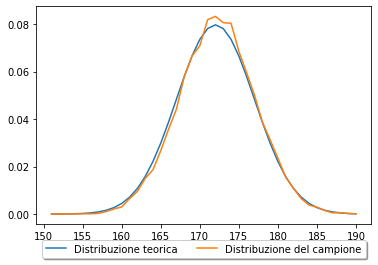

In [176]:
x = np.linspace(151, 190, 40)
coord = []
for i in range(40):
  count = 0
  for item in height:
    if (item > (151 + i) and item <= (151 + i + 1)):
      count = count + 1
  coord.append(count / len(height))
dnd = []
for i in x:
  dnd.append(scipy.stats.norm(172, 5).pdf(i))
plt.plot(x, dnd)
plt.plot(x, coord)
legenda = ["Distribuzione teorica", "Distribuzione del campione"]
plt.legend(legenda,loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.show()

In [178]:
@interact_manual(taglia=["S", "M", "L", "XL"])
def es92(taglia = "M"):
  a, b = 0, 0
  #purtroppo questa versione di python non supporta gli switch case (nè il match case)
  if taglia == "S":
    a, b = 150, 164
  elif taglia == "M":
    a, b = 164, 172
  elif taglia == "L":
    a, b = 172, 180 
  elif taglia == "XL":
    a, b = 180, 191
  
  cm = 500
  x = np.linspace(151, 200, cm)
  
  nd1 = []
  for i in range(cm):
    count = 0
    for item in height:
      if (item > (151 + i/10) and item <= (151 + i/10 + 1)):
        count = count + 1
    nd1.append(count / len(height))

  nd2 = [x for x in height if x > a and x <= b]
  
  ris1 = round(scipy.stats.norm(172, 5).cdf(b) - scipy.stats.norm(172, 5).cdf(a), 3)
  print("Risultati attesi: " + str(ris1))
  ris2 = round(len(nd2) / len(height), 3)
  print("Risultati ottenuti: " + str(ris2))

  y = np.minimum(bounds(x, a, b), nd1)

  plt.plot(x, nd1)
  plt.fill_between(x, y, alpha=0.30)
  plt.xlim(150, 200)

interactive(children=(Dropdown(description='taglia', index=1, options=('S', 'M', 'L', 'XL'), value='M'), Butto…